#Chapter 6 - Best subset selection training

In [2]:
require(ISLR)

Loading required package: ISLR


In [3]:
summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

In [4]:
Hitters <- na.omit(Hitters)
with(Hitters,sum(is.na(Salary))) #Sum should be zero

[1] 0

Best subset selection
--
<hr>

In [5]:
library(leaps)
regfit.full <- regsubsets(Salary~.,data = Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

In [6]:
regfit.full <- regsubsets(Salary~.,data = Hitters,nvmax= 19)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

In [7]:
names(summary(regfit.full)) #Shows variables in the system associated with the summary

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Mallow's CP plot
<hr>


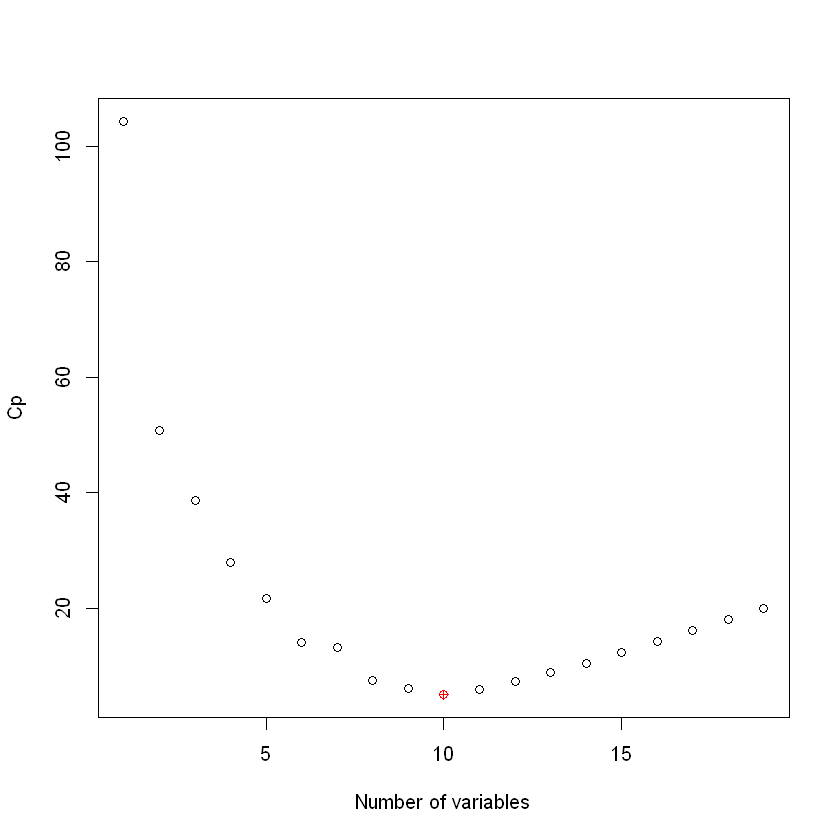

In [8]:
reg.summary <- summary(regfit.full)
plot(reg.summary$cp,xlab = "Number of variables",ylab="Cp")
loc <- as.integer(which.min(reg.summary$cp))
points(loc,reg.summary$cp[loc],col = "red",pch = 10)

Plot methods for a regsub object in R

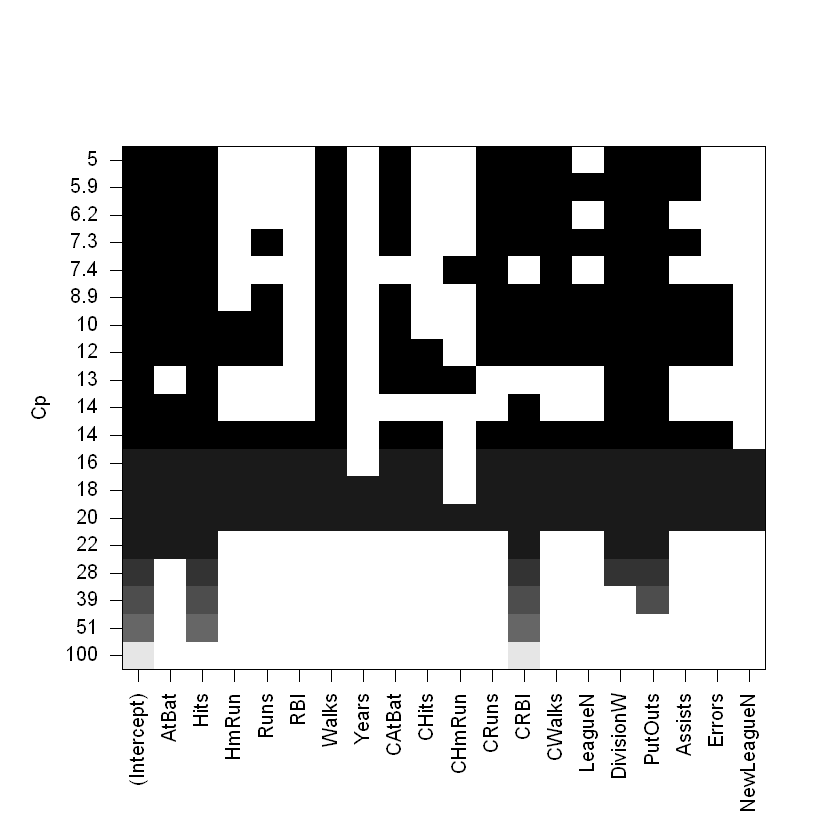

In [9]:
plot(regfit.full,scale = "Cp")

Black tiles correspond to variables that where assigned. Blank correspond to variables left out.
This plot shows that models that included all the variables or very few variables correspond to 
high values of Cp. Model with 10 variables presented the lowest value and similar models shows 
similar low values of Cp.

In [10]:
coef(regfit.full,10) # Coefficients with 10 variables

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

Forward Selection
<hr>

In [11]:
regfit.forward <- regsubsets(Salary~.,data = Hitters,nvmax= 19,method = "forward")
summary(regfit.forward)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

All models in the forward selection method are nested

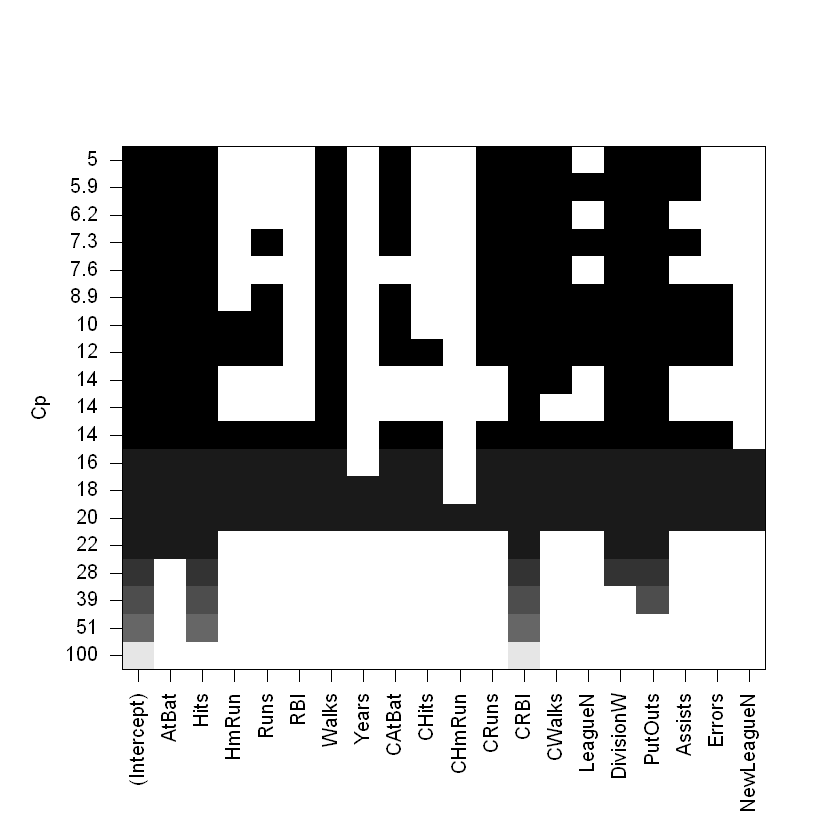

In [12]:
plot(regfit.forward,scale = "Cp")

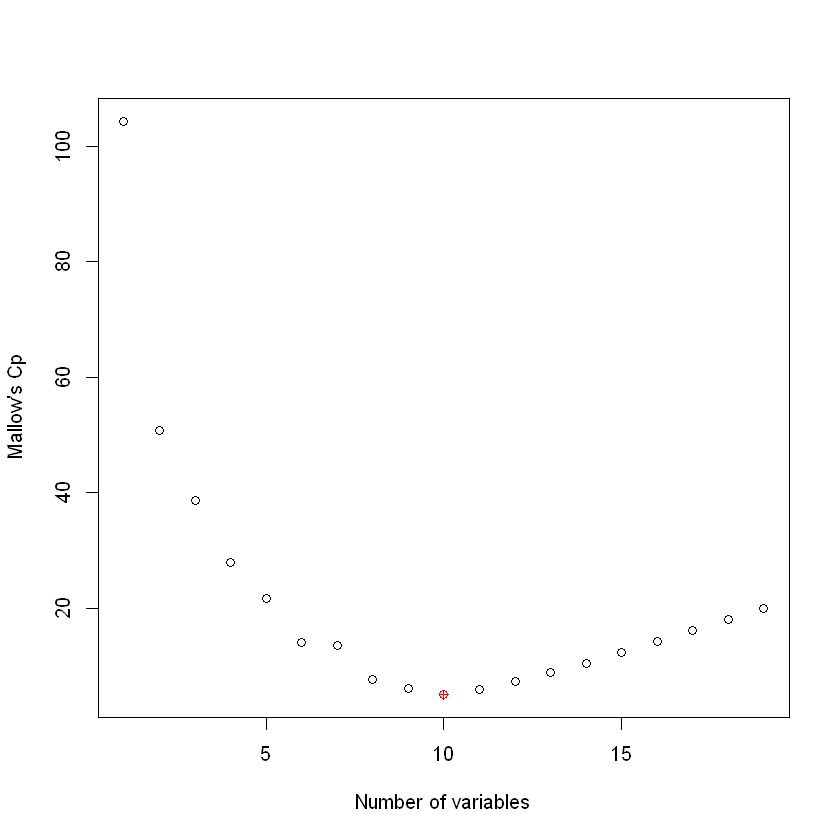

In [13]:
regfit.forward.summary <- summary(regfit.forward)
plot(regfit.forward.summary$cp,xlab = "Number of variables", ylab = "Mallow's Cp")
loc = which.min(regfit.forward.summary$cp)
points(loc,regfit.forward.summary$cp[loc],pch=10,col = "red")

### Validation set approach 
<hr>

In [14]:
?sample

In [15]:
set.seed(1) #for reproducibility

train <- sample(seq(nrow(Hitters)),180,replace= FALSE)
regfit.forward <- regsubsets(Salary~.,data = Hitters[train,],nvmax = 19,method = "forward")
summary(regfit.forward) 

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters[train, ], nvmax = 19, 
    method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "   

In [16]:
val.errors <- rep(NA,19)
x.test <- model.matrix(Salary~., data=Hitters[-train,])
i = 4
for (i in 1:19){
    coef = coef(regfit.forward,i)
    pred = x.test[,names(coef)]%*%coef #%*% is Matrix multiplication operator in R
    val.errors[i] = mean((pred-Hitters[-train,]$Salary)^2)
}

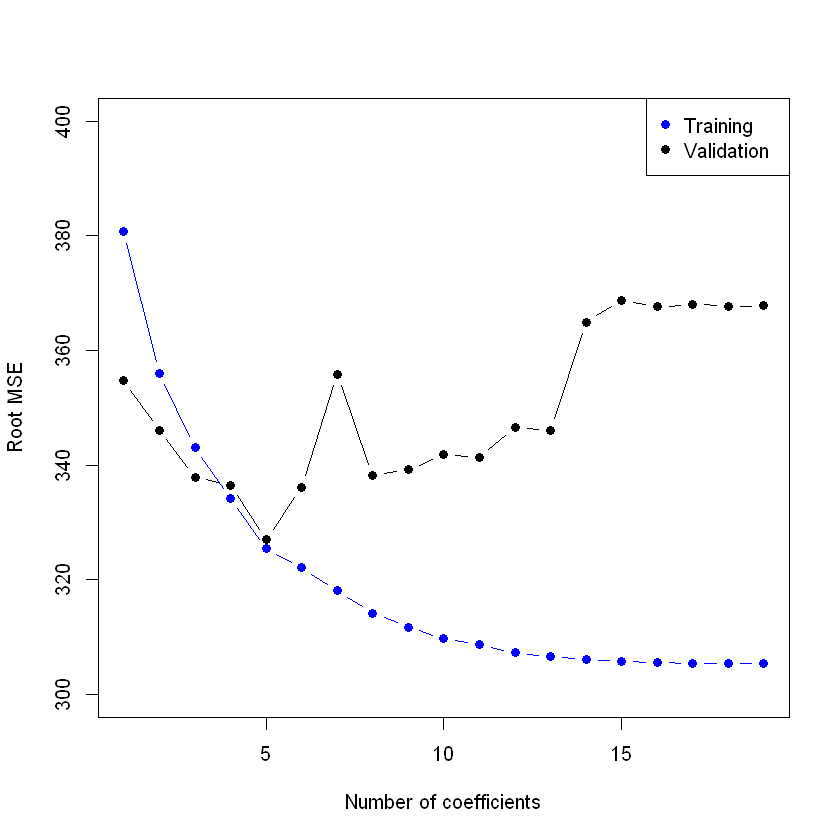

In [25]:
plot(sqrt(val.errors),xlab = "Number of coefficients", ylab = "Root MSE",type = 'b',ylim = c(300,400),pch = 19)
points(sqrt(regfit.forward$rss[-1]/180),col = "blue",type = "b", pch = 19)
legend("topright",legend = c("Training","Validation"),col = c("Blue","black"),pch = 19)

In [26]:
predict.regsubsets <- function(object,newdata,id,...){
    #Objects in R have a call function used when the object was created
    #the formula is part of the call function
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form,newdata)
    coefi <- coef(object,id = id)
    mat[,names(coefi)]%*%coefi
}